Data Exploration & Analysis

In [3]:
#Pneumonia Detection - Data Exploration
print("🏥 Starting Project : Pneumonia Detection from Chest X-Rays")
print("=" * 60)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cv2
from PIL import Image
import random

print("✅ Deep Learning libraries imported successfully!")

# Set up plotting
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Libraries versions:")
print(f"TensorFlow: {tf.__version__}")
print(f"OpenCV: {cv2.__version__}")

🏥 Starting Project : Pneumonia Detection from Chest X-Rays
✅ Deep Learning libraries imported successfully!
📊 Libraries versions:
TensorFlow: 2.20.0
OpenCV: 4.12.0


Dataset Structure Exploration


In [11]:
# Set correct dataset path
print("📍 Setting correct dataset path...")

import os

# Your dataset location with correct file name
dataset_path = "C:/Users/Admin/Downloads/pneumonia-detection"

print(f"📁 Dataset path: {dataset_path}")

# Check if it exists
if os.path.exists(dataset_path):
    print("✅ Dataset found!")
    
    # Show what's inside
    items = os.listdir(dataset_path)
    print(f"📦 Contents: {items}")
else:
    print("❌ Dataset not found at this location")
    print("💡 Please check the exact path")

📍 Setting correct dataset path...
📁 Dataset path: C:/Users/Admin/Downloads/pneumonia-detection
✅ Dataset found!
📦 Contents: ['chest_xray']


Update Dataset Path

In [12]:
#Update to correct dataset path
print("📍 Updating to correct dataset path...")

import os

# Your dataset location - now pointing to chest_xray folder
dataset_path = "C:/Users/Admin/Downloads/pneumonia-detection/chest_xray"

print(f"📁 Dataset path: {dataset_path}")

# Check if it exists
if os.path.exists(dataset_path):
    print("✅ Dataset found!")
    
    # Show what's inside
    items = os.listdir(dataset_path)
    print(f"📦 Contents: {items}")
else:
    print("❌ Dataset not found at this location")

📍 Updating to correct dataset path...
📁 Dataset path: C:/Users/Admin/Downloads/pneumonia-detection/chest_xray
✅ Dataset found!
📦 Contents: ['chest_xray', 'test', 'train', 'val', '__MACOSX']


Explore Dataset Structure

In [13]:
#Explore Dataset Structure
print("📁 Exploring dataset structure...")

def explore_dataset_structure(base_path):
    print(f"🔍 Exploring: {base_path}")
    
    if not os.path.exists(base_path):
        print(f"❌ Path {base_path} doesn't exist!")
        return
    
    for root, dirs, files in os.walk(base_path):
        level = root.replace(base_path, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}📂 {os.path.basename(root)}/")
        sub_indent = ' ' * 2 * (level + 1)
        
        # Show first few files in each directory
        for file in files[:3]:
            print(f"{sub_indent}📄 {file}")
        if len(files) > 3:
            print(f"{sub_indent}... and {len(files) - 3} more files")

explore_dataset_structure(dataset_path)

📁 Exploring dataset structure...
🔍 Exploring: C:/Users/Admin/Downloads/pneumonia-detection/chest_xray
📂 chest_xray/
  📂 chest_xray/
    📄 .DS_Store
    📂 test/
      📄 .DS_Store
      📂 NORMAL/
        📄 IM-0001-0001.jpeg
        📄 IM-0003-0001.jpeg
        📄 IM-0005-0001.jpeg
        ... and 231 more files
      📂 PNEUMONIA/
        📄 person100_bacteria_475.jpeg
        📄 person100_bacteria_477.jpeg
        📄 person100_bacteria_478.jpeg
        ... and 387 more files
    📂 train/
      📄 .DS_Store
      📂 NORMAL/
        📄 .DS_Store
        📄 IM-0115-0001.jpeg
        📄 IM-0117-0001.jpeg
        ... and 1339 more files
      📂 PNEUMONIA/
        📄 .DS_Store
        📄 person1000_bacteria_2931.jpeg
        📄 person1000_virus_1681.jpeg
        ... and 3873 more files
    📂 val/
      📄 .DS_Store
      📂 NORMAL/
        📄 .DS_Store
        📄 NORMAL2-IM-1427-0001.jpeg
        📄 NORMAL2-IM-1430-0001.jpeg
        ... and 6 more files
      📂 PNEUMONIA/
        📄 .DS_Store
        📄 person194

Data Distribution Analysis

In [14]:
# Analyze Data Distribution
print("📊 Analyzing data distribution...")

def count_images_per_class(base_path):
    class_counts = {}
    
    for split in ['train', 'test', 'val']:
        split_path = os.path.join(base_path, split)
        if os.path.exists(split_path):
            print(f"\n🎯 {split.upper()} Split:")
            for class_name in ['NORMAL', 'PNEUMONIA']:
                class_path = os.path.join(split_path, class_name)
                if os.path.exists(class_path):
                    num_images = len([f for f in os.listdir(class_path) 
                                    if f.endswith(('.jpeg', '.jpg', '.png'))])
                    class_counts[f"{split}_{class_name}"] = num_images
                    print(f"   {class_name}: {num_images} images")
                else:
                    print(f"   ❌ {class_name} folder not found")
    
    return class_counts

# Count images
image_counts = count_images_per_class(dataset_path)

if image_counts:
    print("\n📈 Total Dataset Summary:")
    total_images = sum(image_counts.values())
    print(f"   Total Images: {total_images}")

📊 Analyzing data distribution...

🎯 TRAIN Split:
   NORMAL: 1341 images
   PNEUMONIA: 3875 images

🎯 TEST Split:
   NORMAL: 234 images
   PNEUMONIA: 390 images

🎯 VAL Split:
   NORMAL: 8 images
   PNEUMONIA: 8 images

📈 Total Dataset Summary:
   Total Images: 5856


Visualize Sample Images

🖼️ Displaying sample chest X-ray images...


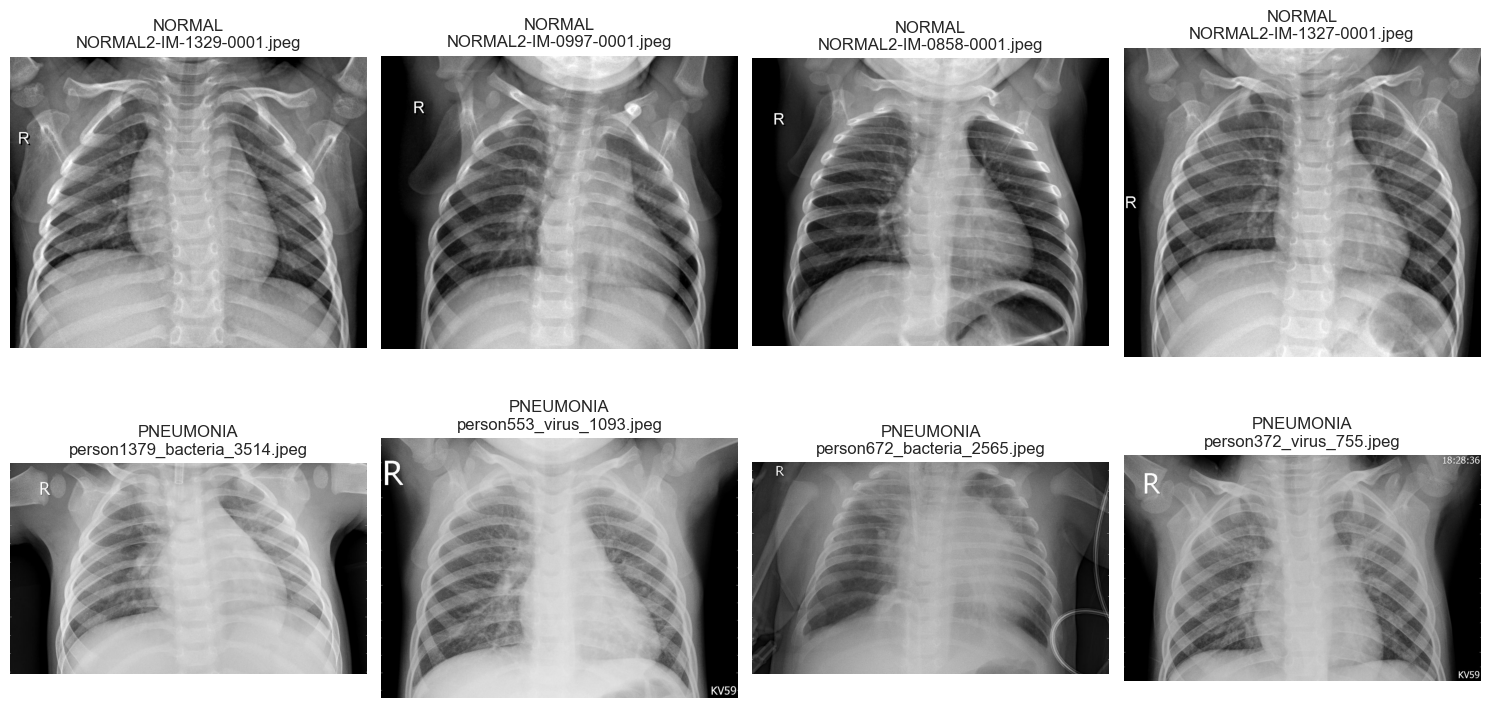

🔍 Medical Observation:
   - NORMAL: Clear lung fields, visible rib cages
   - PNEUMONIA: White patches/consolidations in lung areas
   - Look for opacity differences in the lung regions


In [15]:
# Visualize Sample Images
print("🖼️ Displaying sample chest X-ray images...")

def display_sample_images(base_path, num_samples=8):
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.ravel()
    
    samples_collected = 0
    
    for class_name in ['NORMAL', 'PNEUMONIA']:
        class_path = os.path.join(base_path, 'train', class_name)
        
        if os.path.exists(class_path):
            # Get random sample of images
            image_files = [f for f in os.listdir(class_path) 
                          if f.endswith(('.jpeg', '.jpg', '.png'))]
            
            if image_files:
                selected_files = random.sample(image_files, min(4, len(image_files)))
                
                for i, img_file in enumerate(selected_files):
                    if samples_collected < 8:
                        img_path = os.path.join(class_path, img_file)
                        
                        # Read and display image
                        img = cv2.imread(img_path)
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        
                        axes[samples_collected].imshow(img, cmap='gray')
                        axes[samples_collected].set_title(f'{class_name}\n{img_file}')
                        axes[samples_collected].axis('off')
                        
                        samples_collected += 1
    
    # Hide any unused subplots
    for i in range(samples_collected, 8):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

display_sample_images(dataset_path)

print("🔍 Medical Observation:")
print("   - NORMAL: Clear lung fields, visible rib cages")
print("   - PNEUMONIA: White patches/consolidations in lung areas")
print("   - Look for opacity differences in the lung regions")

Data Visualization

📈 Creating comprehensive data visualizations...


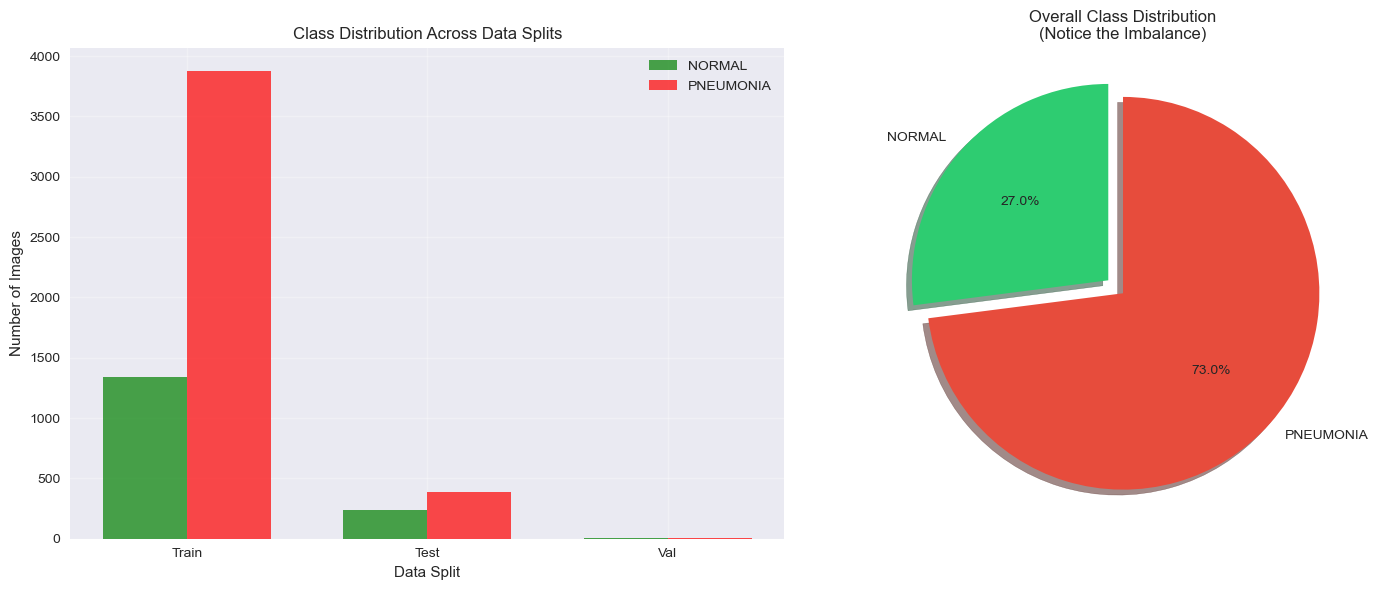


📊 Class Balance Analysis:
   NORMAL: 1583 images (27.0%)
   PNEUMONIA: 4273 images (73.0%)
   Imbalance Ratio: 2.70:1

⚠️  Data Challenges:
   - Class imbalance (common in medical data)
   - Very small validation set
   - We'll use techniques to handle these!


In [16]:
#Create Data Visualizations
print("📈 Creating comprehensive data visualizations...")

# Prepare data for visualization
splits = ['Train', 'Test', 'Val']
normal_counts = [1341, 234, 8]
pneumonia_counts = [3875, 390, 8]

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Class distribution across splits
x = np.arange(len(splits))
width = 0.35

axes[0].bar(x - width/2, normal_counts, width, label='NORMAL', color='green', alpha=0.7)
axes[0].bar(x + width/2, pneumonia_counts, width, label='PNEUMONIA', color='red', alpha=0.7)

axes[0].set_xlabel('Data Split')
axes[0].set_ylabel('Number of Images')
axes[0].set_title('Class Distribution Across Data Splits')
axes[0].set_xticks(x)
axes[0].set_xticklabels(splits)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Overall class imbalance
total_normal = sum(normal_counts)
total_pneumonia = sum(pneumonia_counts)

colors = ['#2ecc71', '#e74c3c']
explode = (0.1, 0)  # explode the 1st slice

axes[1].pie([total_normal, total_pneumonia], 
           explode=explode, 
           labels=['NORMAL', 'PNEUMONIA'], 
           colors=colors,
           autopct='%1.1f%%', 
           shadow=True, 
           startangle=90)
axes[1].set_title('Overall Class Distribution\n(Notice the Imbalance)')

plt.tight_layout()
plt.show()

print(f"\n📊 Class Balance Analysis:")
print(f"   NORMAL: {total_normal} images ({total_normal/5856*100:.1f}%)")
print(f"   PNEUMONIA: {total_pneumonia} images ({total_pneumonia/5856*100:.1f}%)")
print(f"   Imbalance Ratio: {total_pneumonia/total_normal:.2f}:1")

print("\n⚠️  Data Challenges:")
print("   - Class imbalance (common in medical data)")
print("   - Very small validation set")
print("   - We'll use techniques to handle these!")

Image Properties Analysis

In [17]:
# Analyze Image Properties
print("📏 Analyzing image properties...")

def analyze_image_properties(base_path):
    properties = {
        'heights': [],
        'widths': [], 
        'channels': [],
        'formats': [],
        'file_sizes': []
    }
    
    # Sample images from each class
    for class_name in ['NORMAL', 'PNEUMONIA']:
        class_path = os.path.join(base_path, 'train', class_name)
        
        if os.path.exists(class_path):
            image_files = [f for f in os.listdir(class_path) 
                          if f.endswith(('.jpeg', '.jpg', '.png'))][:15]  # Sample 15 per class
            
            for img_file in image_files:
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path)
                
                if img is not None:
                    properties['heights'].append(img.shape[0])
                    properties['widths'].append(img.shape[1])
                    properties['channels'].append(img.shape[2] if len(img.shape) == 3 else 1)
                    properties['formats'].append(img_file.split('.')[-1].upper())
                    
                    # File size in KB
                    file_size_kb = os.path.getsize(img_path) / 1024
                    properties['file_sizes'].append(file_size_kb)
    
    if properties['heights']:
        print("📐 Image Properties Summary:")
        print(f"   Height Range: {np.min(properties['heights'])} - {np.max(properties['heights'])} px")
        print(f"   Width Range: {np.min(properties['widths'])} - {np.max(properties['widths'])} px")
        print(f"   Average Dimensions: {np.mean(properties['heights']):.0f} x {np.mean(properties['widths']):.0f} px")
        print(f"   Channels: {set(properties['channels'])}")
        print(f"   File Formats: {set(properties['formats'])}")
        print(f"   File Size Range: {np.min(properties['file_sizes']):.1f} - {np.max(properties['file_sizes']):.1f} KB")

analyze_image_properties(dataset_path)

📏 Analyzing image properties...
📐 Image Properties Summary:
   Height Range: 480 - 1928 px
   Width Range: 856 - 2138 px
   Average Dimensions: 1084 x 1412 px
   Channels: {3}
   File Formats: {'JPEG'}
   File Size Range: 38.8 - 1037.9 KB
